# Осциллятор


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import integrate
import math as m
import scipy.linalg as la
import scipy.sparse.linalg as sla
def oscillator(t, z):
    global omega
    dy = np.zeros(2)
    dy[0] = z[1]
    dy[1] = (-1*(omega)**2)*z[0]
    
    return dy

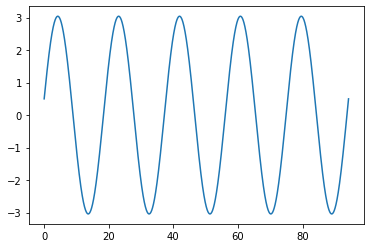

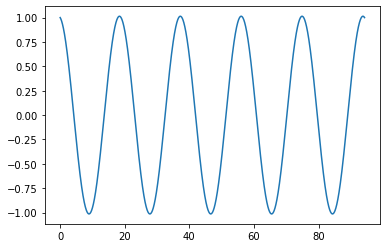

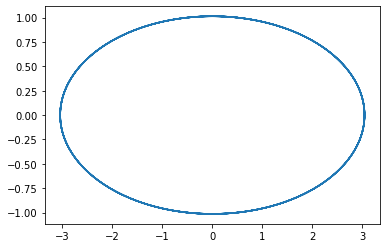

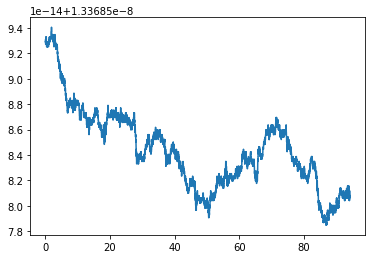

In [3]:
k = 9
_m = 1
T = 2*m.pi*m.sqrt(k/_m)
omega = 2*m.pi/T
N = 1e4
R0 = [0.5, 1.]

t0, t1 = 0, 5*T                # start and end

t = np.linspace(t0, t1, 10000)
R = np.zeros((len(t), len(R0)), dtype=np.float64)   # array for solution
R[0, :] = R0
r = integrate.ode(oscillator).set_integrator("dopri5")  # choice of method
r.set_initial_value(R0, t0)   # initial values
for i in range(1, t.size):
    R[i, :] = r.integrate(t[i]) # get one more value, add it to the array
    if not r.successful():
        raise RuntimeError("Could not integrate")

E0 = max(R[:,1])**2 * k/2
fig = plt.figure()
ax = fig.add_subplot(111)
surf = ax.plot(t, R[:,0])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
surf1 = ax1.plot(t, R[:,1])

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
surf2 = ax2.plot(R[:, 0], R[:,1])

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
surf3 = ax3.plot(t, (R[:,0]**2/2 + k*R[:,1]**2/2 - E0)/E0)

## Затухающий осциллятор


In [4]:
def oscillator(t, z):
    global omega
    global gamma
    dy = np.zeros(2)
    dy[0] = z[1]
    dy[1] = (-1*(omega)**2)*z[0] - gamma*z[1]
    
    return dy

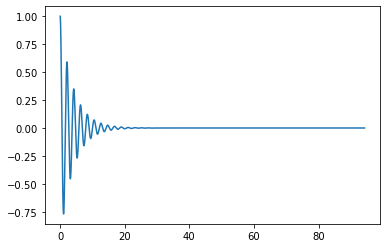

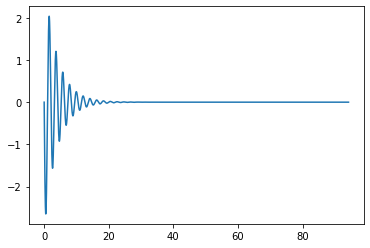

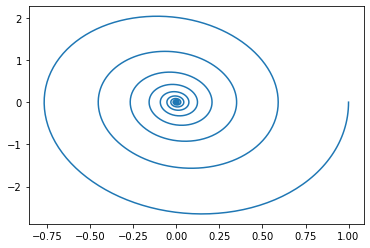

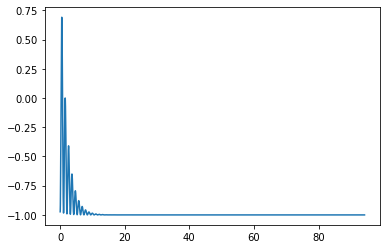

In [5]:
k = 9
_m = 1
gamma = 0.5
T = 2*m.pi*m.sqrt(k/_m)
omega = 3
N = 1e4
R0 = [1., 0]

t0, t1 = 0, 5*T                # start and end

t = np.linspace(t0, t1, 10000)
R = np.zeros((len(t), len(R0)), dtype=np.float64)   # array for solution
R[0, :] = R0
r = integrate.ode(oscillator).set_integrator("dopri5")  # choice of method
r.set_initial_value(R0, t0)   # initial values
for i in range(1, t.size):
    R[i, :] = r.integrate(t[i]) # get one more value, add it to the array
    if not r.successful():
        raise RuntimeError("Could not integrate")

E0 = max(R[:,1])**2 * k/2
fig = plt.figure()
ax = fig.add_subplot(111)
surf = ax.plot(t, R[:,0])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
surf1 = ax1.plot(t, R[:,1])

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
surf2 = ax2.plot(R[:, 0], R[:,1])

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
surf3 = ax3.plot(t, (R[:,0]**2/2 + k*R[:,1]**2/2 - E0)/E0)

# Колебания с вынуждающей силой

In [6]:
def oscillator2(t, z):
    omega = 3
    gam = 0.5
    A0 = 1
    omegaF = 2
    F = A0*np.cos(omegaF*t)
    dy = np.zeros(2)
    dy[0] = z[1]
    dy[1] = (-1*(omega)**2)*z[0] - gam*z[1] + F
    
    return dy

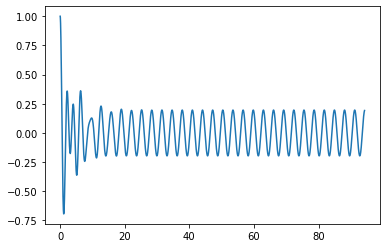

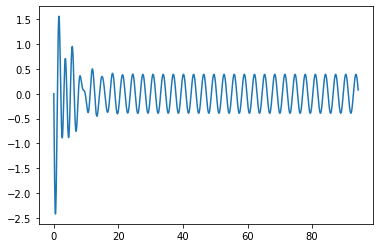

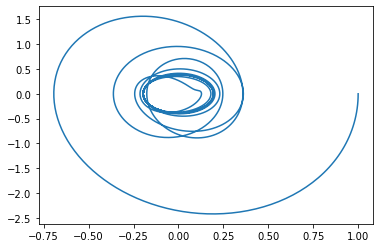

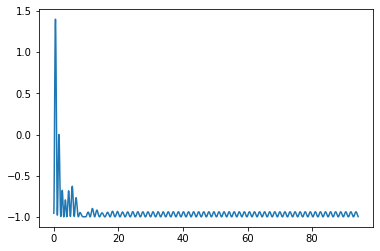

In [7]:
k = 9
_m = 1
gamma = 0.5
T = 2*m.pi*m.sqrt(k/_m)
omega = 3
omega1 = 2
A = 1
N = 1e4
R0 = [1., 0]

t0, t1 = 0, 5*T                # start and end

t = np.linspace(t0, t1, 10000)
R = np.zeros((len(t), len(R0)), dtype=np.float64)   # array for solution
R[0, :] = R0
r = integrate.ode(oscillator2).set_integrator("dopri5")  # choice of method
r.set_initial_value(R0, t0)   # initial values
for i in range(1, t.size):
    R[i, :] = r.integrate(t[i]) # get one more value, add it to the array
    if not r.successful():
        raise RuntimeError("Could not integrate")

E0 = max(R[:,1])**2 * k/2
fig = plt.figure()
ax = fig.add_subplot(111)
surf = ax.plot(t, R[:,0])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
surf1 = ax1.plot(t, R[:,1])

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
surf2 = ax2.plot(R[:, 0], R[:,1])

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
surf3 = ax3.plot(t, (R[:,0]**2/2 + k*R[:,1]**2/2 - E0)/E0)

# Cистема осцилляторов

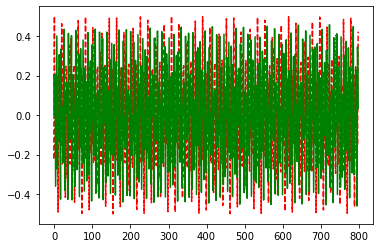

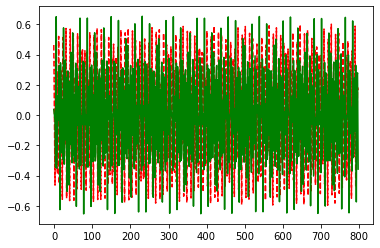

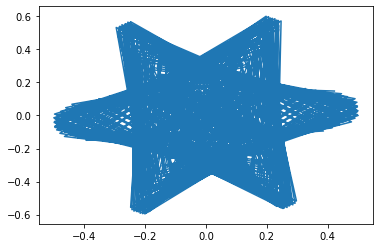

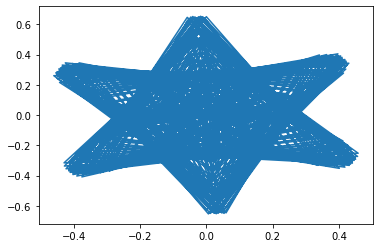

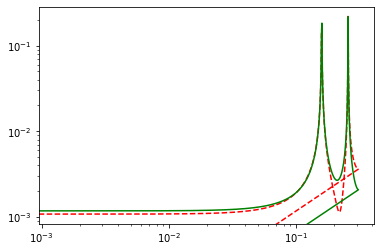

In [46]:
N = 2
_m = [1, 1]
k = [1, 0.8, 1]
R0 = np.array([0.5, 0])
v0 = np.array([0, -0])

omega = np.zeros((N+1, N), dtype=np.float64)

for alpha in range(N+1):
    for beta in range(N):
        omega[alpha, beta] = k[alpha]/_m[beta]
        
Omega = np.zeros((N, N), dtype=np.float64)

for i in range(N):
    if i == 0:
        Omega[i, i] = omega[0, 0] + omega[1, 0]
        Omega[0, 1] = -omega[1, 0]
        
    if i > 0:
        if i < N-1:
            Omega[i, i-1] = -omega[i, i]
            Omega[i,i] = omega[i, i] + omega[i+1, i]
            Omega[i, i+1] = -omega[i+1, i]
        else:
            Omega[i, i-1] = -omega[i, i]
            Omega[i, i] = omega[i, i] + omega[i+1, i]
            
Theta, Sigma = np.linalg.eig(Omega)

Theta = np.sqrt(Theta)
SigmaV = np.zeros((N, N), dtype=np.float64)

for i in range(N):
    for j in range(N):
        SigmaV[j, i] = -Theta[i]*Sigma[j, i]
        
C1 = np.dot(np.linalg.inv(Sigma),R0[None].T.conj())
C2 = np.dot(np.linalg.inv(SigmaV),v0[None].T.conj())

C = np.sqrt(C1**2 + C2**2)

alpha = np.zeros(N, dtype=np.float64)

for i in range(N):
    if C[i] == 0:
        alpha[i] = 0
    else:
        alpha[i] = np.arctan(C2[i]/C1[i])
        
        if C1[i] < 0:
            alpha[i] = m.pi + alpha[i]
            
        if C1[i] > 0:
            if C2[i] < 0:
                alpha[i] = 2*m.pi+alpha[i]

N = len(Omega)
N1 = int(500)
Tmax = 800
t = np.zeros(N1, dtype=np.float64)

X = np.zeros((N, N1), dtype=np.float64)
Xv = np.zeros((N, N1), dtype=np.float64)

for j in range(N1):
    t[j] = (j-1)/(N1-1)*Tmax
    
for j in range(N1):
    s = np.zeros(N, dtype=np.float64)
    
    for i in range(N):
        s = s+ C[i]*Sigma[:,i]*np.cos(Theta[i]*t[j] + alpha[i])
        
    X[:, j] = s
    
for j in range(N1):
    s = np.zeros(N, dtype=np.float64)
    
    for i in range(N):
        s = s+ C[i]*Sigma[:,i]*Theta[i]*np.sin(Theta[i]*t[j] + alpha[i])
        
    Xv[:, j] = -s
    
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
p1 = ax1.plot(t, X[0],'r--', t, X[1],'g')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
p2 = ax2.plot(t, Xv[0],'r--', t, Xv[1],'g')

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
p3 = ax3.plot(X[0], Xv[0])

fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
p4 = ax4.plot(X[1], Xv[1])



c1 = np.fft.fft(X[0])
c2 = np.fft.fft(X[1])

Cm1 = np.zeros(N1//2, dtype=np.float64)
Cm2 = np.zeros(N1//2, dtype=np.float64)
Freq = np.zeros(N1//2, dtype=np.float64)

for j in range(1, N1//2):
    Cm1[j-1] = abs(c1[j-1])/(N1/2)
    Cm2[j-1] = abs(c2[j-1])/(N1/2)
    Freq[j-1] = (j-1)/Tmax

fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
ax6.set_xscale('log')
ax6.set_yscale('log')
p6 = ax6.plot(Freq, Cm1,'r--', Freq, Cm2,'g')